## Inicjalizacja środowiska programistycznego

In [4]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
# sys.path.append("../modules")
!pip install idx2numpy
#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=dd7402c993c6c838c4ab95509dcd39d8f737ec15fba56cf6d3d351f8ab6b3978
  Stored in directory: /root/.cache/pip/wheels/87/e5/e7/70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Transponowana warstwa splotowa

Architektury używające warstw splotowych i łączących prowadzą zwykle do redukcji rozmiaru obrazu, ang. `downsampling`,
w kolejnych warstwach sieci. Warstwy, które prowadzą do zwiększenia rozmiaru obrazu to warstwy ekspansji, ang. `upsampling layers`.
Najbardziej popularną warstwą ekspansji jest transponowana warstwa splotowa, ang. `transposed convlolution layer`.


Źródło rysunków: [A guide to convolution arithmetic for deep learning, arXiv:1603.07285](https://arxiv.org/abs/1603.07285)

Standardowa reprezentacja splotu, jako okna z wagami przesuwającego się po obrazie:

![image.png](attachment:db6bc85f-24a0-4bad-9f1f-00daa624229b.png)

Macierzowa reprezentacja splotu. Obraz wejściowy w tej reprezentacji jest spłaszczony do wektora:

![image.png](attachment:d4d0f120-60ec-49f1-8906-c329ef465de1.png)

Wędrujące okno może być zastąpione pojedynczą operacją mnożenia macierzy reprezentującej wagi dla wszystkich elementów obrazu.
Dla przykładu powyżej macierz reprezentująca wszystkie wagi splotu ma postać:

![image.png](attachment:8a974149-ba67-4146-9b50-36be2f367de6.png)

Operacja splotu sprowadza się więc do mnożenia macierzy:

$$
{\huge
r = C \times d
}
$$
**r** - wynik splotu o kształcie (4,1)

**C** - macierz splotu, o kształcie (4,16)

**d** - wektor danych o kształcie (16,1)


Macierz wynikowa w tym przykładzie ma kształt `(4,1)` i można ją zamienić na macierz o kształcie `(2,2)`, takim jakiego oczekujuemy dla
wyniku splotu w tym przykładzie.

Macierz $C^{T}$ możemy traktować jako macierz operacji transpozycji która przeprowadza wektory o kształcie `(4,1)` w wektory o kształcie `(16,1)`

$$
{\huge
r' = C^{T} \times r
}
$$
**r'** - wynik splotu o kształcie (16,1)

$\mathbf{C^{T}}$ - macierz splotu o kształcie (4,16)

**r** - wektor danych o kształcie (4,1)

W ten sposób uzyskaliśmy skalowanie w górę - z wektora o rozmiarze `(4,1)` uzyskaliśmy wektor o rozmiarze `(16,1)`

**Uwaga:** transponowany splot nie odtwarza oryginalnej macierzy danych, ponieważ w ogólności


$$
{\huge
C^{T} \cdot C \neq 1_{16 \times 16}
}
$$
**Po operacji splotu transponowanego odzyskujemy jedynie oryginalny kształt.**

Splot transponowany może być też reprezentowany jako standardowy splot z odpowiednim wypełnianiem zerami.

![image.png](attachment:02252792-cf0b-4d03-ba72-7d6aa4dbb1f1.png)

Interfejs użytkownika warstwy konwolucyjnej w Keras:
```Python
tf.keras.layers.Conv2DTranspose(
    filters,             # liczba filtrów
    kernel_size,         # rozmiar filtra: krotka (n,m), lub (n) dla filtrów kwadratowych
    strides=(1, 1),      # wartość kroku w obu wymiarach
    padding='valid',     # sposób dopełnienia:
                         # `valid` - brak dopełnienia
                         # `same` - dopełnienie zerami na brzegach, w rozmiarze połowy
                         # dopełnienie wynosi połowę rozmiaru filtra w odpowiednim kierunku
    output_padding=None, # dopełnienie na brzegach wynikowego obrazu
)
```

 **Proszę**:

* zbudować warstwę transponowaną splotową z jednym filtrem o rozmiarze `(3,3)` i pozostałych parametrach z domyślnymi wartościami
* podać na jej wejściu rysunek o rozmiarze `(2,2)` wypełniony jedynkami
* wypisać na ekran kształt wejścia i wyjścia warstwy

In [8]:
filters = 1
kernel_size = (3,3)
fig = np.ones((1, 2, 2, 1))
layer = tf.keras.layers.Conv2DTranspose(
    filters,             # liczba filtrów
    kernel_size,         # rozmiar filtra: krotka (n,m), lub (n) dla filtrów kwadratowych
    strides=(1, 1),      # wartość kroku w obu wymiarach
    padding='valid',     # sposób dopełnienia:
                         # `valid` - brak dopełnienia
                         # `same` - dopełnienie zerami na brzegach, w rozmiarze połowy
                         # dopełnienie wynosi połowę rozmiaru filtra w odpowiednim kierunku
    output_padding=None, # dopełnienie na brzegach wynikowego obrazu
)
print("fig shape", fig.shape)
print("out shape", layer(fig).shape)


fig shape (1, 2, 2, 1)
out shape (1, 4, 4, 1)


 **Proszę**:

* zbudować warstwę transponowaną splotową z filtrami o rozmiarze `(3,3)` i pozostałych parametrami tak dobranymi, by uzyskać
  transformację obrazu `(2,2,1)` na `(8,8,3)`, gdzie ostatnia wartość oznacza liczbę kanałów
* wypisać na ekran kształt wejścia i wyjścia warstwy

**Wskazówka:** proszę zajrzeć do dokumentacji [tf.keras.layers.Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose), by sprawdzić wzór na rozmiar wyniku warstwy Conv2DTranspose.

In [19]:
filters = 2
kernel_size = (3,3)
fig = np.ones((1, 2, 2, 1))
layer = tf.keras.layers.Conv2DTranspose(
    filters,             # liczba filtrów
    kernel_size,         # rozmiar filtra: krotka (n,m), lub (n) dla filtrów kwadratowych
    strides=4,      # wartość kroku w obu wymiarach
    padding='valid',     # sposób dopełnienia:
                         # `valid` - brak dopełnienia
                         # `same` - dopełnienie zerami na brzegach, w rozmiarze połowy
                         # dopełnienie wynosi połowę rozmiaru filtra w odpowiednim kierunku
    output_padding=None, # dopełnienie na brzegach wynikowego obrazu
)
print("fig shape", fig.shape)
print("out shape", layer(fig).shape)


fig shape (1, 2, 2, 1)
out shape (1, 8, 8, 2)


Standardowe parametry zwiększające rozmiar danych o czynnik dwa to:

```Python
tf.keras.layers.Conv2DTranspose(strides=2, padding='same')
```

### Zagadnienie: sieć generująca obrazy okręgów z danych wejściowych w postaci trójki:

$$
\Large{(x, y, R)}
$$

* obrazy wyjściowe powinny mieć rozdzielczość 16$\times$16
* środki okręgów powinny się zawierać w płaszczyźnie docelowego obrazu
* dane do treningu będą pochodziły z losowo generowanych okręgów
* rozważymy dwie architektury: w pełni połączoną i splotową

**Proszę:**

* napisać funkcję `discGenerator(res=16)` która będzie generowała pary `(features, label)`:
    * `features`  - parametry okręgów
    * `labels`  - obrazy o rozdzielczości $res \times res$
* parametry okręgów powinny być losowe:
    * współrzędne środka w zakresie `[0,res]`
    * promień w zakresie `[0,res/2]`
* kod powinien używać funkcji a pakietu TensorFlow, np. `tf.random.uniform` wszędzie gdzie to możliwe
* okręgi można generować z użyciem funkcji `skimage.draw.disk` (co niestety łamie wymaganie używania jedynie funkcji pakietu TensorFlow)
* funkcja powinna zwracać wartości z użyciem słowa kluczowego `yield` (taka funkcja jest [generatorem](https://book.pythontips.com/en/latest/generators.html)):
```Python

def discGenerator(res=16):
    ...
    yield  features, label
```
* funkcja może być sprawdzona w następujący sposób:
```Python

x = next(discGenerator())
print(colored("Features shape:","blue"), x[0].shape)
print(colored("Labels shape:","blue"), x[1].shape)
```

**Uwaga:**
* parametr `res` musi mieć wartość domyślną

In [27]:
import skimage

def discGenerator(res=16):
  while True:
    # Losowe parametry okręgu
    x = tf.random.uniform(shape=(), minval=0, maxval=res, dtype=tf.float64)
    y = tf.random.uniform(shape=(), minval=0, maxval=res, dtype=tf.float64)
    R = tf.random.uniform(shape=(), minval=0, maxval=res//2, dtype=tf.float64)

    # Generowanie obrazu okręgu
    label = np.zeros((res, res, 1), dtype=np.float32)
    rr, cc = skimage.draw.disk((x, y), R, shape=label.shape[:2])
    label[rr, cc] = 1
    label = tf.reshape(label, (res, res, 1))
    features = tf.stack([tf.cast(x, tf.float32), tf.cast(y, tf.float32), tf.cast(R, tf.float32)])

    yield features, label
x = next(discGenerator())
print(colored("Features shape:","blue"), x[0].shape)
print(colored("Labels shape:","blue"), x[1].shape)

Features shape: (3,)
Labels shape: (16, 16, 1)


**Proszę**:
* stworzyć macierze cech i etykiet:
```Python
features = []
labels = []
```
i wypełnić je 1024 przykładami wygenerowanymi przez generator `discGenerator()`

* wpisać na ekran kształty cech i etykiet

In [28]:
features = []
labels = []
res = 16
for i in range(1024):
  x = next(discGenerator(res))
  features.append(x[0])
  labels.append(x[1])
features = np.array(features).reshape(-1, 3)
labels = np.array(labels).reshape(-1, res, res, 1)

print(features.shape)
print(labels.shape)

(1024, 3)
(1024, 16, 16, 1)


**Proszę:**

* zdefiniować sieć w pełni połączoną: `model_fc` która może generować obrazy okręgów.
* sieć powinna mieć odpowiednie kształty wejścia i wyjścia
* wystarczy by sieć miałą trzy warstwy ukryte
* wartości wyjściowych pikseli powinny się zawierać w zakresie `[0,1]`
* wypisać na ekran podsumowanie modelu

In [41]:
bias = tf.keras.initializers.RandomUniform(minval = -1, maxval = 1)
model_fc = tf.keras.models.Sequential([
    tf.keras.Input(shape=(3,)),
    tf.keras.layers.Dense(16, activation='relu', input_shape=(3,), kernel_initializer='HeNormal', bias_initializer=bias),  # Warstwa wejściowa (3 cechy: x, y, R)
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='HeNormal', bias_initializer=bias),  # Pierwsza warstwa ukryta
    tf.keras.layers.Dense(256, activation='sigmoid', kernel_initializer="HeNormal", bias_initializer = bias), # Druga warstwa ukryta
    # tf.keras.layers.Dense(res * res, activation='sigmoid'),  # Warstwa wyjściowa (res*res pikseli)
    tf.keras.layers.Reshape((res, res, 1))  # Zmiana kształtu na (res, res, 1)
])

# Wypisanie podsumowania modelu
model_fc.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 16, 16, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,264 (137.75 KB)

 Trainable params: 35,264 (137.75 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**
* zdefiniować sieć `model_cnn` z transponowanymi warstwami splotowymi: `model_cnn` która realizuje to samo zadanie co sieć z poprzedniej komórki
* wypisać na ekran podsumowanie modelu

**Wskazówka:** w przypadku sieci splotowej można użyć jednej warstwy gęstej do zwiększenia rozmiaru początkowego obrazu:
```Python

  tf.keras.layers.Dense(4, activation='relu',
                        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                        kernel_initializer="HeNormal"),
  tf.keras.layers.Reshape((2,2,1)),
```

In [39]:
model_cnn = tf.keras.models.Sequential([
  tf.keras.Input(shape=(3,)),
  tf.keras.layers.Dense(4, activation='relu',
                        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                        kernel_initializer="HeNormal"),
  tf.keras.layers.Reshape((2,2,1)),
  tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=4, strides=2, padding='same', activation='relu'),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(filters=1, kernel_size=1, strides=1, padding='same', activation='sigmoid', kernel_initializer='HeNormal')
])

# Wypisanie podsumowania modelu
model_cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 2, 2, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_22             │ (None, 4, 4, 64)       │         1,088 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_23             │ (None, 8, 8, 32)       │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_24             │ (None, 16, 16, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 1)      │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,849 (112.69 KB)

 Trainable params: 28,849 (112.69 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* przeprowadzić trening sieci `model_fc` na `500` epokach z rozmiarem paczki ustawionym na `32`
* narysować zmianę funkcji straty w funkcji numeru epoki na zbiorze treningowym i walidacyjnym
* jako zbioru walidacyjnego użyć `10%` zbioru podanego jako treningowy
* kod trenujący powinien być zawarty w funkcji `trainModel(model, nEpochs)` i zawierać:
    * harmonogram zmiany współczynnika uczenia
    * wywołanie wczesnego zatrzymania (sprawdzić wyniki bez zatrzymania)
    * rysowane historii funkcji straty
    * jako funkcji straty proszę użyć entropii krzyżowej: `binary_crossentropy` - każdy z pikseli należy do jednej z dwu klas: `biały/czarny`
* wypisać na ekran wartość funkcji straty wytrenowanego modelu na zbiorze treningowym

Epoch 1/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.5441 - val_loss: 1.0381
Epoch 2/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8682 - val_loss: 0.6169
Epoch 3/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5756 - val_loss: 0.4697
Epoch 4/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4442 - val_loss: 0.4091
Epoch 5/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3921 - val_loss: 0.3821
Epoch 6/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3733 - val_loss: 0.3649
Epoch 7/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3327 - val_loss: 0.3522
Epoch 8/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3399 - val_loss: 0.3495
Epoch 9/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3276 - val_loss: 0.3449
Epoch 10/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3160 - val_loss: 0.3342
Epoch 11/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3089 - val_loss: 0.3325
Epoch 12/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

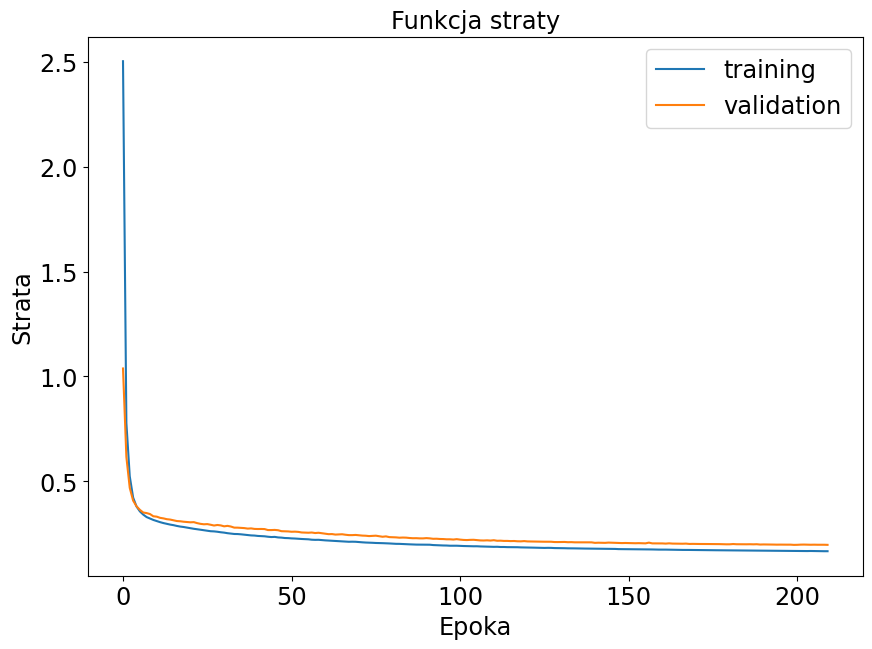

Wartość funkcji straty na zbiorze treningowym: 0.17045310139656067
CPU times: user 32.1 s, sys: 2.19 s, total: 34.3 s
Wall time: 39.1 s


In [42]:
%%time

import matplotlib.pyplot as plt

def trainModel(model, nEpochs):
    """Trenuje model sieci neuronowej.

    Args:
        model: Model sieci neuronowej do trenowania.
        nEpochs: Liczba epok treningu.
    """

    # Definiowanie harmonogramu zmiany współczynnika uczenia
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-3,
        decay_steps=10000,
        decay_rate=0.9)

    # Kompilacja modelu
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss='binary_crossentropy')

    # Definiowanie wczesnego zatrzymania
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    # Trenowanie modelu
    history = model.fit(features, labels, epochs=nEpochs, batch_size=32,
                        validation_split=0.1, callbacks=[early_stopping])

    # Rysowanie historii funkcji straty
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Funkcja straty')
    plt.ylabel('Strata')
    plt.xlabel('Epoka')
    plt.legend()
    plt.show()

    # Wypisanie wartości funkcji straty na zbiorze treningowym
    loss = model.evaluate(features, labels, verbose=0)
    print(f"Wartość funkcji straty na zbiorze treningowym: {loss}")

# Wywołanie funkcji trainModel() dla modelu model_fc
nEpochs = 500
trainModel(model_fc, nEpochs)

**Proszę:**

* napisać funkcję `plotGenerated(model, params)`, która rysuje panel z czterema obrazy wygenerowanymi przez sieć
  dla zadanego parametrów
* rysunki powinny zawierać okręgi narysowane z nominalnymi wartościami parametrów
* wywołać funkcję `plotGenerated(model, params)` dla modelu `model_fc` i parametrów:

$$
\Large{(x, y, R)} = (0,0,10), (16,0,10), (8,8,5), (8,8,1)
$$

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


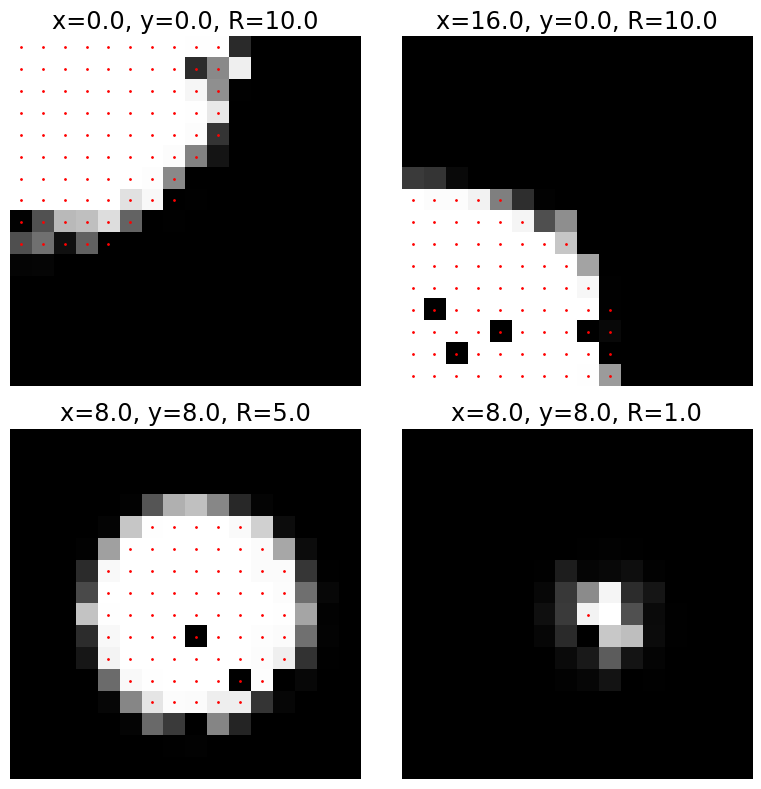

In [48]:

from skimage.draw import disk

def plotGenerated(model, params):
  """Rysuje panel z czterema obrazami wygenerowanymi przez sieć.

  Args:
      model: Model sieci neuronowej.
      params: Macierz parametrów okręgów (x, y, R).
  """

  res = 16  # Rozmiar obrazu

  # Generowanie obrazów
  generated_images = model.predict(params)

  # Rysowanie obrazów
  fig, axes = plt.subplots(2, 2, figsize=(8, 8))
  for i, ax in enumerate(axes.flatten()):
    # Wyświetlanie wygenerowanego obrazu
    ax.imshow(generated_images[i, :, :, 0], cmap='gray')

    # Rysowanie okręgu z nominalnymi wartościami parametrów
    x, y, R = params[i]
    rr, cc = disk((x, y), R, shape=(res, res))
    ax.scatter(cc, rr, s=1, c='r')  # Czerwone punkty
  # Czerwony okrąg

    ax.set_title(f"x={x:.1f}, y={y:.1f}, R={R:.1f}")
    ax.axis('off')

  plt.tight_layout()
  plt.show()

# Wywołanie funkcji plotGenerated() dla modelu model_fc i parametrów
params = np.array([(0, 0, 10), (16, 0, 10), (8, 8, 5), (8, 8, 1)])
plotGenerated(model_fc, params)

**Proszę:**

* przeprowadzić trening sieci `model_cnn` z tymi samymi ustawieniami co dla sieci `model_dnn`
* narysować wygenerowane obrazy dla tych samych parametrów, co w przypadku sieci w pełni połączonej


In [ ]:
%%time
...rozwiązanie...
pass

# Architektura autokodera

Sieć ze splotem nie trenuje się zbyt dobrze. Powodem może być niewłaściwa reprezentacja okręgu przez trzy liczby: `(x,y,R)`.
Może istnieje jakaś reprezentacja, która będzie szybciej prowadziła do uzyskania dobrego modelu?

Zamiast samodzielnie eksperymentować z różnymi reprezentacjami skonstruujemy sieć, która sama znajdzie reprezentację- **autokoder**, ang. `autoencoder, AE`.

Architektura AE składa się z dwu części:

**sieci kodującej** - sieci która z danych wejściowych tworzy reprezentację o zadanym rozmiarze. Przestrzeń do której prowadzi sieć kodująca jest nazywana przestrzenią ukrytą, ang. `hidden space` lub `bottleneck` - ponieważ to jest miejsce gdzie liczba parametrów opisujących zagadnienie jest zwykle najmniejsza.

**sieci dekodującej** - sieci która z reprezentacji w przestrzeni ukrytej odtwarza oryginalną postać danych wejściowych

W czasie treningu obrazy z dekodera są porównywane z danymi wejściowymi. Wagi są zmieniane tak, by minimalizować różnicę między nimi.

![image.png](attachment:137ea920-9e45-4daf-a448-29a4fd15ca49.png)

**Proszę:**

* stworzyć model `encoder` - konwolucyjną sieć kodującą wykonującą operację kodowana, czyli zmiany kształtu danych
$$
\Large{    
(16,16,1) \rightarrow (2,2,1)
}
$$
* proszę użyć klasy `tf.keras.Sequential`
* proszę wypisać na ekran podsumowanie modelu

In [ ]:
...rozwiązanie...
pass

**Proszę:**

* stworzyć model `decoder` - sieć dekodującą wykonującą operację odkodowana, czyli zmiany kształtu danych
$$
\Large{    
(2,2,1) \rightarrow (16,16,1)
}
$$
* proszę użyć klasy `tf.keras.Sequential`
* proszę użyć transponowanych splotowych warstw z tymi samymi ustawieniami jak w sieci kodującej
* proszę wypisać na ekran podsumowanie modelu

In [ ]:
...rozwiązanie...
pass

**Proszę:**

* utworzyć  `model_cnn_ae` - autokoder -  sieć sekwencyjną która składa się z sieci kodującej, i dekodującej:
```Python

[encoder, decoder]

```
* wywołać model na jednym przykładzie korzystając z funkcji `predict`
```Python

model_cnn_ae.predict(...)
```
* wypisać na ekran podsumowanie modelu

**Uwaga:**
* model przyjmuje paczki, więc dane wejściowe muszą mieć odpowiedni wymiar, nawet jeśli podajemy pojedynczy przykład
* co jest teraz danymi wejściowymi do modelu?

In [ ]:
...rozwiązanie...
pass

**Proszę:**

* przeprowadzić trening autokodera
* użyć ustawień treningu jak dla poprzednich modeli

In [ ]:
%%time
...rozwiązanie...
pass

**Proszę:**

* wypisać na ekran parametry pierwszego przykładu ze zbioru danych
* uruchomić koder na obrazie z pierwszego przykładu
* wypisać na ekran zakodowaną postać obrazu

In [ ]:
...rozwiązanie...
pass

**Proszę:**

* napisać funkcję `plotDecoded(model)` która rysuje rysunki uzyskane z modelu `model_cnn_ae` dla czterech losowych przykładów z danych treningowych:
    * parametry z przykładów treningowych są kodowane przez `encoder`
    * zakodowane parametry są odkodowywane przez `decoder`
* rysunki powinny być podpisane wartościami parametrów
* rysunki powinny zawierać okręgi narysowane z nominalnymi wartościami parametrów

In [ ]:
...rozwiązanie...
plotDecoded(model_cnn_ae)

# Zadanie domowe

Skonstruować sieć, która będzie generowała obrazy okręgów o rozdzielczości `(256, 256)`.


**Proszę:**

* wygenerować 1024 przykłady obrazów okręgów o rozdzielczości `(256,256)` o losowych parametrach:
    * współrzędne środka w zakresie [0,N]
    * promień w zakresie [0,N/2]
     
* skonstruować **sieć w pełni połączoną** generującą obrazy z trójki:
$$
\Large{(x, y, R)}
$$

* skonstruować **sieć autokodującą** z wymiarem ukrytym o kształcie `(4,4,1)`
* przeprowadzić trening obu sieci
* narysować obrazy dla czterepch pierwszych przykładów ze zbioru treningowego
* zwrócić uwagę na rozmiar modeli

In [ ]:
##Data generation
...rozwiązanie...
print(colored("Features shape:","blue"),features.shape)
print(colored("Labels shape:","blue"),labels.shape)

In [ ]:
%%time
## autoencoder model
...rozwiązanie...
#Evaluation
plotDecoded(model_cnn_ae)

In [ ]:
%%time
##fully connected model
...rozwiązanie...
#model evaluation
params = features[0:4]
plotGenerated(model_fc, params)